In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load ground truth example

In [ ]:
file_path = r"C:\Users\Sophia\Documents\rPPG\pilot\ground_truth.txt"

with open(file_path, "r") as f:
    lines = f.readlines()

if len(lines) < 3:
    raise ValueError("File must contain at least 3 lines")

amplitude = np.fromstring(lines[0], sep=' ')
pulse_rate = np.fromstring(lines[1], sep=' ')
time = np.fromstring(lines[2], sep=' ')



<class 'numpy.ndarray'>


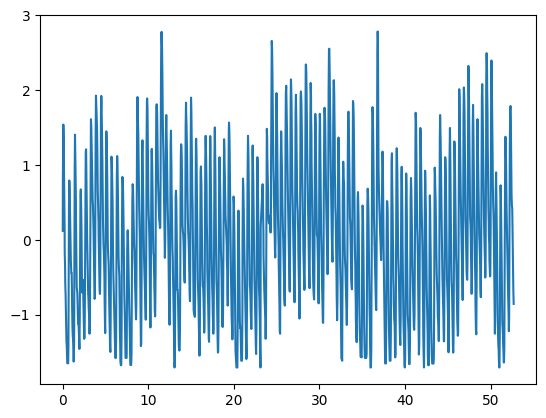

In [16]:
plt.plot(time, amplitude)

In [14]:

with h5py.File(r"C:\Users\Sophia\Documents\UTI-11-12-2025\data\10.10.10.138_20251211_16.h5", "r") as f:
    print(list(f.keys())) 
    data = f["data"][:]
    ts = f["data_timestamps"][:]
    info = f["info"][:]
    info_ts = f["info_timestamps"][:]
    for key in f.keys():
        print(key, f[key].shape, f[key].dtype)


['data', 'data_timestamps', 'info', 'info_timestamps']
data (17578, 2056) uint8
data_timestamps (17578,) float64
info (225, 128) uint8
info_timestamps (225,) float64


In [ ]:
df_data = pd.DataFrame(data)
df_data["timestamp"] = ts
df_data["timestamp"] = pd.to_datetime(df_data["timestamp"], unit="s")

df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2047,2048,2049,2050,2051,2052,2053,2054,2055,timestamp
0,2,11,0,0,4,172,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:00:00.202502966
1,2,11,0,0,4,172,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:00:00.458467007
2,2,11,0,0,1,110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:00:00.459304094
3,2,11,0,0,4,172,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:00:00.714459896
4,2,11,0,0,4,172,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:00:00.969706059


In [18]:
df_info = pd.DataFrame(info)
df_info

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
221,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
222,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
223,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_info["timestamp"] = pd.to_datetime(info_ts, unit="s")

In [20]:
df_info

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,timestamp
0,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:00:01.236848116
1,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:00:17.234961987
2,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:00:33.235822916
3,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:00:49.234277964
4,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:01:05.235613108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:58:41.185467005
221,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:58:57.186383963
222,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:59:13.184226990
223,4,255,0,0,0,64,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2025-12-11 19:59:29.187906981


In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

file = r"C:\Users\Sophia\Documents\UTI-11-12-2025\data\10.10.10.138_20251211_16.h5"
hdf = h5py.File(file, 'r')

# Definitions
DATA_PACK_HEAD = b"\x02\x0B\x00\x00"  # Defined as bytes
data_add = 36

data = hdf['data'][:]
data_timestamps = hdf['data_timestamps'][:]

datas = []
ids = []
seqs = []
seqsts = []

# Data processing
for raw_data, ts in zip(data, data_timestamps):
    pack_id = bytes(raw_data[0:4])
    if pack_id == DATA_PACK_HEAD:
        frame_len = int.from_bytes(raw_data[4:6], byteorder='big')
        frame_seq = int.from_bytes(raw_data[24:26], byteorder='big')
        npk = 0
        process_next = True
        local_data_add = data_add  # Use a local variable to avoid overwriting the original
        while process_next:
            if local_data_add + 4 <= len(raw_data):
                data_head = raw_data[local_data_add:local_data_add+4]
                data_len = raw_data[local_data_add+3] * 2
                if data_len > 0:
                    if local_data_add + 4 + data_len <= len(raw_data):
                        data_bytes = raw_data[local_data_add+4:local_data_add+4+data_len]
                    else:
                        data_bytes = raw_data[local_data_add+4:]
                    data_array = np.frombuffer(data_bytes, dtype='>i2')  # Convert to np.array of integers
                    datas.append(data_array)
                    ids.append(int.from_bytes(data_head[0:3], byteorder='big'))
                    seqs.append(frame_seq)
                    seqsts.append(ts)
                    npk += 1
                    local_data_add = local_data_add + 4 + data_len
                else:
                    process_next = False
            else:
                process_next = False
                

seqs = np.array(seqs)
ids = np.array(ids)
seqsts = np.array(seqsts)

######

idECGs =  65540               
idSpO2 = 458768
idResp = 327688
idP1 = 4063240
idPVC = 3473416
idART = 2883592
idCO2 = 4784136


indices = np.where(ids == idECGs)[0]
Fs = np.round(len(datas[indices[0]])/np.median(np.diff(seqsts)))
dt = 1/Fs
dtSeq = dt * len(datas[indices[0]])
print(f"Fs = {Fs}")

C:\Users\Sophia\AppData\Local\Temp\ipykernel_1928\3346435246.py:34: RuntimeWarning: overflow encountered in scalar add
  if local_data_add + 4 + data_len <= len(raw_data):
C:\Users\Sophia\AppData\Local\Temp\ipykernel_1928\3346435246.py:35: RuntimeWarning: overflow encountered in scalar add
  data_bytes = raw_data[local_data_add+4:local_data_add+4+data_len]
C:\Users\Sophia\AppData\Local\Temp\ipykernel_1928\3346435246.py:44: RuntimeWarning: overflow encountered in scalar add
  local_data_add = local_data_add + 4 + data_len
C:\Users\Sophia\AppData\Local\Temp\ipykernel_1928\3346435246.py:32: RuntimeWarning: overflow encountered in scalar multiply
  data_len = raw_data[local_data_add+3] * 2


: 

In [ ]:
indices_spo2 = np.where(ids == idSpO2)[0]

lengths = [len(datas[i]) for i in indices_spo2]
np.unique(lengths)

In [ ]:
i = indices_spo2[0]

plt.plot(datas[i])
plt.title(f"SpO2 block length = {len(datas[i])}")
plt.show()

In [ ]:
spo2_signal = np.concatenate([datas[i] for i in indices_spo2])

plt.plot(spo2_signal)
plt.show()

In [ ]:
Fs_spo2 = len(datas[indices_spo2[0]]) / np.median(np.diff(seqsts[indices_spo2]))
Fs_spo2